In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../../data/simple_loan.csv')
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [21]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [23]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [24]:
# encode label
def labelEncode(data, columns):
    for i in columns:
        #         print(i)
        data[i + '_'], _ = pd.factorize(data[i], sort=True)


feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)
df['target_'], class_names = pd.factorize(df.target)
df.head()

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0


In [25]:
class_names

Index(['no', 'yes'], dtype='object')

In [26]:
# เลือก column ไว้ใช้ train
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns]
X.head()

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


In [27]:
y = df['target_']
y

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    1
16    1
Name: target_, dtype: int64

In [28]:
# แบ่งข้อมูล train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [29]:
X_train.shape, X_test.shape

((11, 4), (6, 4))

In [30]:
y_train.shape, y_test.shape

((11,), (6,))

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
model.score(X_test, y_test)

0.8333333333333334

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score -> {:.3f}'.format(model.score(X_test, y_test)))
print('Accuracy Score: ', accuracy_score(y_test, y_pred).round(3))

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)  # 83 percent

Score -> 0.833
Accuracy Score:  0.833
              precision    recall  f1-score   support

          no       0.75      1.00      0.86         3
         yes       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

[[3 0]
 [1 2]]


In [34]:
print(y_test, '<- y_test (Actual or True data)')
print(y_pred, '<- y_predicted from the model')

16    1
1     0
5     0
11    1
8     1
14    0
Name: target_, dtype: int64 <- y_test (Actual or True data)
[1 0 0 0 1 0] <- y_predicted from the model


In [35]:
y_pred

array([1, 0, 0, 0, 1, 0], dtype=int64)

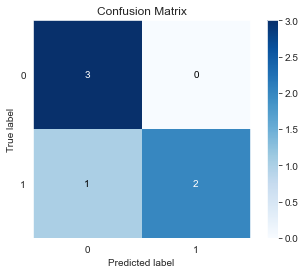

In [36]:
import scikitplot as skplot

skplot.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.savefig('eval-loan-cm1b.png', dpi=120)
plt.show()

In [37]:
X_input = [[0, 1, 1, 1], [1, 0, 0, 2], [1, 1, 0, 1], [2, 0, 1, 1]]
y_predict = model.predict(X_input)
print(y_predict)

for i in y_predict:
    print('Result : {}'.format(class_names[i]))

[1 0 1 0]
Result : yes
Result : no
Result : yes
Result : no


e:\workspace\machine_learning\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
